# --------------------------------------------- RFM ---------------------------------------------------------

## Görev 1: Veriyi Anlama ve Hazırlama

In [1]:
import numpy as np
import pandas as pd
import squarify
import matplotlib.pyplot as plt

In [2]:
# 1. Veri okunur ve dataframe oluşturulur.
raw_df = pd.read_csv("data.csv")
df_d = raw_df.copy()
df_d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# 2. Veri setinin betimsel istatistiklerini incelenir.
df_d.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [4]:
df_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# 3. Veri setinde eksik gözlem olup olmadığı incelenir.
df_d.apply(lambda x: x.isnull().sum()) 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df_d.apply(lambda x: x.isnull().mean())

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

In [7]:
# 4. Eksik gözlemler veri setinden çıkartılır.
df_d = df_d.dropna() 
df_d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# 5. Eşsiz ürün sayısı:
df_d.StockCode.nunique()

3684

In [9]:
# 6. Hangi üründen kaçar adet olduğu bulunur:
Q = df_d.groupby(by='Description').agg({'Quantity': 'sum'})
Q

,Quantity
Description,
4 PURPLE FLOCK DINNER CANDLES,140
50'S CHRISTMAS GIFT BAG LARGE,1883
DOLLY GIRL BEAKER,2391
I LOVE LONDON MINI BACKPACK,360
I LOVE LONDON MINI RUCKSACK,1
...,...
ZINC T-LIGHT HOLDER STARS SMALL,4850
ZINC TOP 2 DOOR WOODEN SHELF,5
ZINC WILLIE WINKIE CANDLE STICK,2595


In [10]:
# 7. En çok sipariş edilen 5 ürünü çoktan aza doğru sıralanır:
Q.sort_values(by='Quantity', ascending=False).head(5)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [11]:
# 8. Faturalardaki ‘C’ iptal edilen işlemleri göstermektedir. İptal edilen işlemler veri setinden çıkartılır.
df_d = df_d[~df_d.InvoiceNo.apply(lambda x: x.startswith('C'))]

In [12]:
# 9. Fatura başına elde edilen toplam kazancı ifade eden ‘TotalPrice’ adında bir değişken oluşturulur:
df_d['TotalPrice'] = df_d.Quantity * df_d.UnitPrice
df_d.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


# Görev 2: RFM metriklerinin hesaplanması

In [13]:
# Veri setinden eksik gözlemler çıkartılır. Tarih, kullanılacak formata getirilir.
df_d = df_d.drop(labels=['StockCode', 'Description','Quantity','UnitPrice', 'Country'], axis=1)
df_d["InvoiceDate"] = pd.to_datetime(df_d["InvoiceDate"])
df_d["InvoiceDate"] = df_d["InvoiceDate"].apply(lambda t: t.date())
df_d["InvoiceDate"] = pd.to_datetime(df_d["InvoiceDate"])
df_d.head()

,InvoiceNo,InvoiceDate,CustomerID,TotalPrice
0,536365,2010-12-01,17850.0,15.30
1,536365,2010-12-01,17850.0,20.34
2,536365,2010-12-01,17850.0,22.00
3,536365,2010-12-01,17850.0,20.34
4,536365,2010-12-01,17850.0,20.34


In [14]:
# Recency, Frequency ve Monetary tanımları yapılır.
# Müşteri özelinde Recency, Frequency ve Monetary metrikleri groupby, agg ve lambda ile hesaplanır.
# Hesaplanılan metrikler rfm isimli bir değişkene atanır.
# Oluşturulan metrikler isimleri recency, frequency ve monetary olarak değiştirilir.

last_date = pd.to_datetime(['2011-12-11'])

rfm = df_d.groupby(['CustomerID']).agg(
    {
        'InvoiceDate': lambda x: (last_date - x.max()).days,
        'InvoiceNo': lambda x: x.nunique(),
        'TotalPrice': lambda x: x.sum()
    })

rfm.rename(columns={'InvoiceDate': 'recency',
                         'InvoiceNo': 'frequency',
                         'TotalPrice': 'monetary'}, inplace=True)
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,327,1,77183.60
12347.0,4,7,4310.00
12348.0,77,4,1797.24
12349.0,20,1,1757.55
12350.0,312,1,334.40


In [15]:
# K-Means için kopyası oluşturuldu.
rfm_kmeans = rfm.copy()

## Görev 3: RFM skorlarının oluşturulması ve tek bir değişkene çevrilmesi

In [16]:
# Recency, Frequency ve Monetary metrikleri qcut yardımı ile 1-5 arasında skorlara çevirilir.
# Bu skorları recency_score, frequency_score ve monetary_score olarak kaydedilir.
# recency_score ve frequency_score’u tek bir değişken olarak ifade edilir ve RFM_SCORE olarak kaydedilir.

In [17]:
# Recency, Frequency ve Monetary metriklerin qcut yardımı ile 5 aralığa bölünmesi
rfm["recency_score"]   = pd.qcut(rfm['recency'], q = 5, labels=[5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm['frequency'].rank(method="first"), q = 5, labels=[1,2,3,4,5])
rfm["monetary_score"]  = pd.qcut(rfm['monetary'], q = 5, labels=[1,2,3,4,5])
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
CustomerID,,,,,,
12346.0,327,1,77183.60,1,1,5
12347.0,4,7,4310.00,5,5,5
12348.0,77,4,1797.24,2,4,4
12349.0,20,1,1757.55,4,1,4
12350.0,312,1,334.40,1,1,2


In [18]:
def join_rfm(x): 
    return str(x['recency_score']) + str(x['frequency_score'])
rfm['RFM_SCORE'] = rfm.apply(join_rfm, axis=1)
rfm['RFM_SCORE'] = rfm.apply(join_rfm, axis=1)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
12346.0,327,1,77183.60,1,1,5,11
12347.0,4,7,4310.00,5,5,5,55
12348.0,77,4,1797.24,2,4,4,24
12349.0,20,1,1757.55,4,1,4,41
12350.0,312,1,334.40,1,1,2,11


## Görev 4: RFM skorlarının segment olarak tanımlanması

In [19]:
# Oluşturulan RFM skorların daha açıklanabilir olması için segment tanımlamaları yapılır.
# Aşağıdaki seg_map yardımı ile skorlar segmentlere çevrilir.

In [20]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [21]:
rfm['RFM_Level'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,RFM_Level
CustomerID,,,,,,,,
12346.0,327,1,77183.60,1,1,5,11,hibernating
12347.0,4,7,4310.00,5,5,5,55,champions
12348.0,77,4,1797.24,2,4,4,24,at_Risk
12349.0,20,1,1757.55,4,1,4,41,promising
12350.0,312,1,334.40,1,1,2,11,hibernating


In [22]:
# Segmentlerde kaç adet müşteri olduğuna bakılır.
rfm_Level_sort = rfm.groupby('RFM_Level').agg({'RFM_Level': 'count'})
rfm_Level_sort

,RFM_Level
RFM_Level,
about_to_sleep,352
at_Risk,593
cant_loose,63
champions,633
hibernating,1071
loyal_customers,819
need_attention,187
new_customers,42
potential_loyalists,484


## Görev 5: Aksiyon zamanı!

In [23]:
# Segmentlerin ortalama recency, frequency, monetary değerlerine bakılır.

In [24]:
reorderlist = [ 'hibernating', 'at_Risk','cant_loose' ,'about_to_sleep', 'need_attention', 'loyal_customers',
              'promising', 'new_customers', 'potential_loyalists', 'champions']

In [25]:
RFM_Level = rfm.groupby('RFM_Level').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': ['mean', 'count']
}).round(2)

segment_agg = RFM_Level.reindex(reorderlist)
segment_agg = pd.DataFrame(segment_agg)
segment_agg

recency frequency monetary      
                       mean      mean     mean count
RFM_Level                                           
hibernating          218.61      1.10   488.64  1071
at_Risk              154.79      2.88  1084.54   593
cant_loose           133.97      8.38  2796.16    63
about_to_sleep        54.31      1.16   471.99   352
need_attention        53.43      2.33   897.63   187
loyal_customers       34.61      6.48  2864.25   819
promising             24.42      1.00   290.91    95
new_customers          8.43      1.00   388.21    42
potential_loyalists   18.40      2.01  1041.22   484
champions              7.36     12.42  6857.94   633

In [26]:
# "Loyal Customers" sınıfına ait customer ID'leri seçerek excel çıktısı alınır.
loyal_customers = pd.DataFrame(rfm.index[rfm['RFM_Level'] == 'loyal_customers'])
loyal_customers.to_excel('loyal_customers.xlsx')
loyal_customers

,CustomerID
0,12352.0
1,12359.0
2,12370.0
3,12380.0
4,12388.0
...,...
814,18236.0
815,18257.0
816,18259.0
817,18263.0


In [27]:
RFM_Segments = rfm.groupby("RFM_Level").agg({"RFM_Level": "count"})
RFM_Segments = RFM_Segments.reindex(reorderlist)
RFM_Segments

,RFM_Level
RFM_Level,
hibernating,1071
at_Risk,593
cant_loose,63
about_to_sleep,352
need_attention,187
loyal_customers,819
promising,95
new_customers,42
potential_loyalists,484


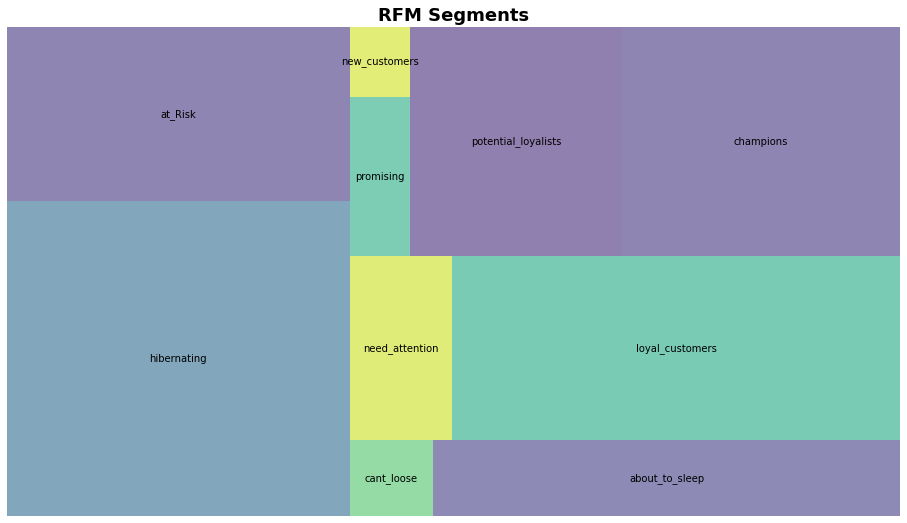

In [28]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=RFM_Segments['RFM_Level'], label=reorderlist, alpha=.6)

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

# --------------------------------------------- K-Means ---------------------------------------------------

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [30]:
rfm_kmeans.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,327,1,77183.60
12347.0,4,7,4310.00
12348.0,77,4,1797.24
12349.0,20,1,1757.55
12350.0,312,1,334.40


In [31]:
sc = MinMaxScaler((0, 1))
df_f = sc.fit_transform(rfm_kmeans)
df_f

array([[8.71313673e-01, 0.00000000e+00, 2.75453040e-01],
       [5.36193029e-03, 2.87081340e-02, 1.53815396e-02],
       [2.01072386e-01, 1.43540670e-02, 6.41399496e-03],
       ...,
       [1.87667560e-02, 4.78468900e-03, 6.35425320e-04],
       [8.04289544e-03, 7.17703349e-02, 7.47621339e-03],
       [1.12600536e-01, 9.56937799e-03, 6.55688982e-03]])

In [32]:
# Modelde Cluster değerleri denenerek optimum hata değerini veren cluster değeri bulunur.
kmeans = KMeans()
ssd = []
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df_f)
    ssd.append(kmeans.inertia_)
ssd

[322.205483948215,
 74.13982079617129,
 40.853717761769005,
 27.19661222582705,
 20.580891966435622,
 16.091315882856073,
 12.745409145988587,
 10.873158437166557,
 9.579656024194229]

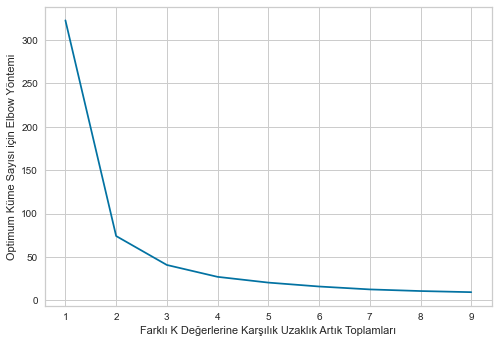

In [33]:
plt.plot(K, ssd, "bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.ylabel("Optimum Küme Sayısı için Elbow Yöntemi")
plt.show()

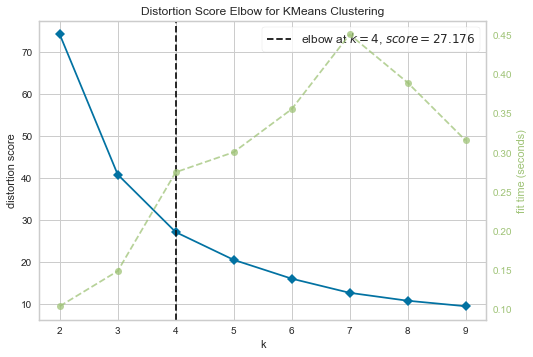

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Optimum cluster değeri 4 olarak bulunur.
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2,10))
elbow.fit(df_f)
elbow.show()

In [35]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(df_f)

In [36]:
kumeler = kmeans.labels_
kumeler

array([2, 1, 3, ..., 1, 1, 1])

In [37]:
pd.DataFrame({"CustomerID": rfm_kmeans.index, "Kumeler": kumeler})

,CustomerID,Kumeler
0,12346.0,2
1,12347.0,1
2,12348.0,3
3,12349.0,1
4,12350.0,2
...,...,...
4334,18280.0,2
4335,18281.0,0
4336,18282.0,1
4337,18283.0,1


In [38]:
rfm_kmeans["cluster_no"] = kumeler
rfm_kmeans["cluster_no"] = rfm_kmeans["cluster_no"] + 1
rfm_kmeans.head()

,recency,frequency,monetary,cluster_no
CustomerID,,,,
12346.0,327,1,77183.60,3
12347.0,4,7,4310.00,2
12348.0,77,4,1797.24,4
12349.0,20,1,1757.55,2
12350.0,312,1,334.40,3


In [39]:
rfm_groupby = rfm_kmeans.groupby("cluster_no").agg({"cluster_no": "count"})
rfm_groupby.head()

,cluster_no
cluster_no,
1,617
2,2161
3,497
4,1064


In [40]:
# Clusterların ortalama recency, frequency, monetary değerlerine bakılır.
rfm_kmeans.groupby("cluster_no").agg(np.mean)

,recency,frequency,monetary
cluster_no,,,
1,193.314425,1.865478,725.534556
2,21.144840,6.447941,3290.703045
3,310.486922,1.350101,566.710322
4,83.425752,2.612782,1006.474410


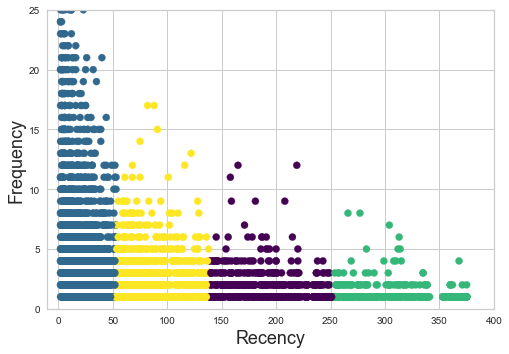

In [41]:
plt.scatter(rfm_kmeans['recency'], rfm_kmeans['frequency'], c=kumeler, s=50, cmap='viridis')
plt.xlabel('Recency', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.xlim([-10, 400])
plt.ylim([0, 25])
plt.show()